In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman03-22.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-05.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-24.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-26.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman02-00.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-21.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman04-18.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-01.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-12.png
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-03.png
/kaggle/in

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/horses-or-humans-dataset
/kaggle/input/horses-or-humans-dataset/horse-or-human
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans
/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/horses
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/humans
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/validation/horses
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/humans
/kaggle/input/horses-or-humans-dataset/horse-or-human/horse-or-human/train/horses
/kaggle/input/horses-or-humans-dataset/horse-or-human/train
/kaggle/input/horses-or-humans-dataset/horse-or-human/train/hu

In [3]:
train_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train'
val_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation'

In [4]:
train_horse_dir = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train/horses'
train_human_dir = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans'

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse46-4.png', 'horse40-1.png', 'horse06-2.png', 'horse07-7.png', 'horse48-3.png', 'horse32-5.png', 'horse08-2.png', 'horse50-7.png', 'horse23-3.png', 'horse11-8.png']
['human06-23.png', 'human16-08.png', 'human14-28.png', 'human16-13.png', 'human12-30.png', 'human16-16.png', 'human11-03.png', 'human13-08.png', 'human08-00.png', 'human10-03.png']


In [6]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [7]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

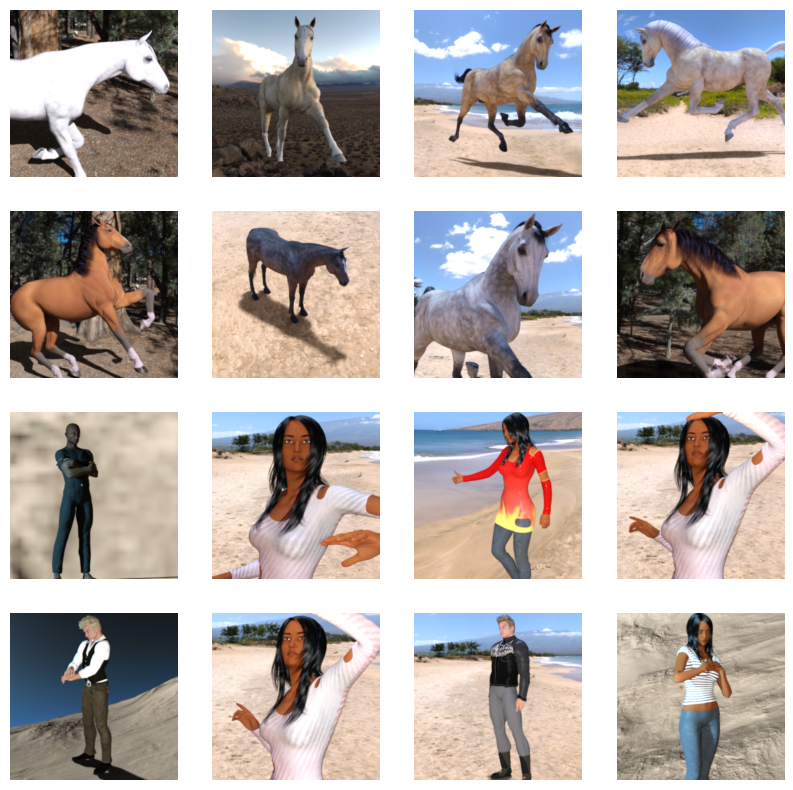

In [8]:
from matplotlib.image import imread
fig, axes = plt.subplots(nrows, ncols,figsize=(10, 10))

pic_index += 8
next_horse_images = [train_horse_dir + '/' + fname for fname in train_horse_names[pic_index - 8:pic_index]]
next_human_images = [train_human_dir + '/' + fname for fname in train_human_names[pic_index - 8:pic_index]]

axes = axes.flatten()

horse_and_human = next_horse_images + next_human_images
horse_and_human

for i, ax in enumerate(axes):
    image = imread(horse_and_human[i])
    ax.imshow(image)
    ax.axis('off')
plt.show()
    


In [9]:
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [10]:
model = tf.keras.models.Sequential([
#     This is first Convulation
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
    keras.layers.MaxPooling2D(2,2),
#     This is second Convulation
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
#     This is third Convulation
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
#     This is fourth Convulation
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
#     This is fifth Convulation
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
#     flattening
    keras.layers.Flatten(),
#     layer 1
    keras.layers.Dense(512, activation = 'relu'),
#     layer 2
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.01),
             metrics = 'acc')

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 15,
    verbose = 1
)

/tmp/ipykernel_23/3924769157.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
9/9 [==============================] - 24s 2s/step - loss: 0.7252 - acc: 0.5063
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 0.6676 - acc: 0.6446
Epoch 3/15
9/9 [==============================] - 9s 972ms/step - loss: 0.7630 - acc: 0.6650
Epoch 4/15
9/9 [==============================] - 9s 972ms/step - loss: 0.5693 - acc: 0.7760
Epoch 5/15
9/9 [==============================] - 10s 1s/step - loss: 0.4315 - acc: 0.8286
Epoch 6/15
9/9 [==============================] - 9s 967ms/step - loss: 0.2452 - acc: 0.9036
Epoch 7/15
9/9 [==============================] - 9s 955ms/step - loss: 0.1158 - acc: 0.9523
Epoch 8/15
9/9 [==============================] - 9s 1s/step - loss: 0.0976 - acc: 0.9640
Epoch 9/15
9/9 [==============================] - 9s 974ms/step - loss: 0.1878 - acc: 0.9455
Epoch 10/15
9/9 [==============================] - 9s 1s/step - loss: 0.2296 - acc: 0.9133
Epoch 11/15
9/9 [==============================] - 9s 973ms/step - loss: 0.1293 -

In [15]:
validation_human_dir = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans'
validation_horse_dir = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/horses'

validation_human_paths = [validation_human_dir + '/' + fname for fname in os.listdir(validation_human_dir)][:5]
validation_horse_paths = [validation_horse_dir + '/' + fname for fname in os.listdir(validation_horse_dir)][:5]

1/1 [==============================] - 0s 269ms/step
It is a human


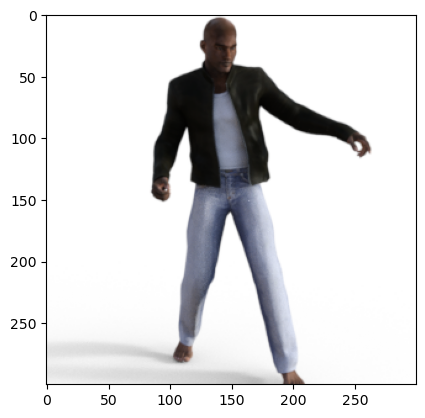

1/1 [==============================] - 0s 24ms/step
It is a human


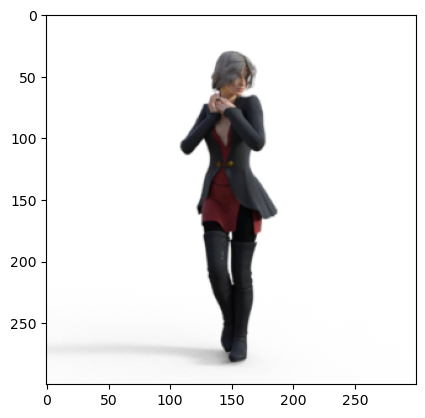

1/1 [==============================] - 0s 26ms/step
It is a human


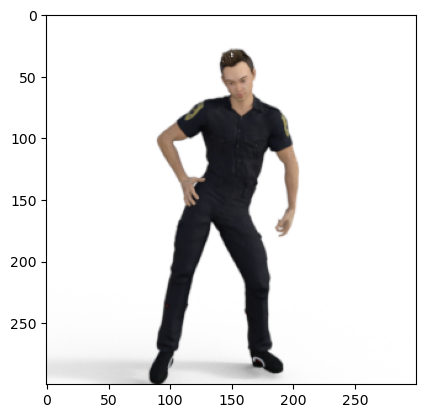

1/1 [==============================] - 0s 24ms/step
It is a human


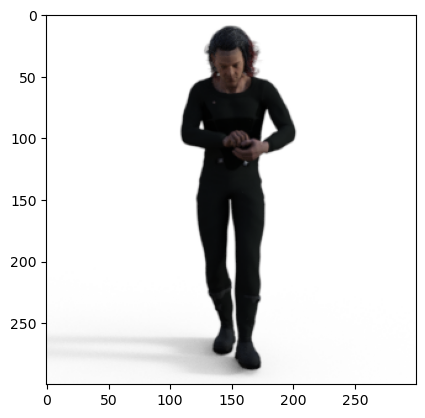

1/1 [==============================] - 0s 23ms/step
It is a human


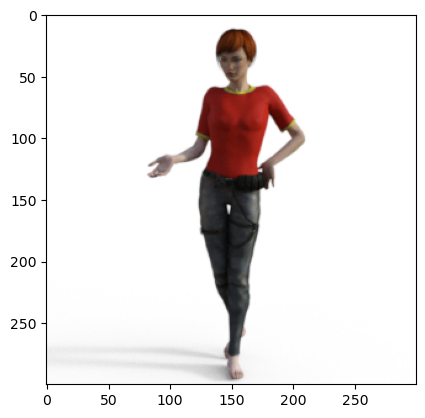

1/1 [==============================] - 0s 20ms/step
It is a human


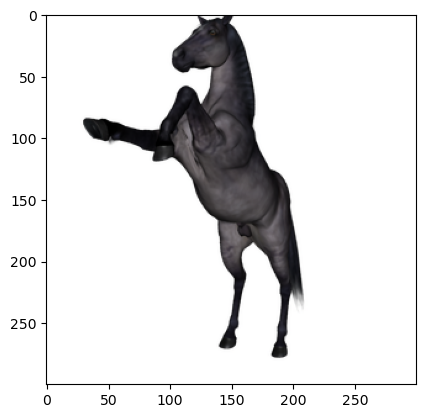

1/1 [==============================] - 0s 22ms/step
It is a horse


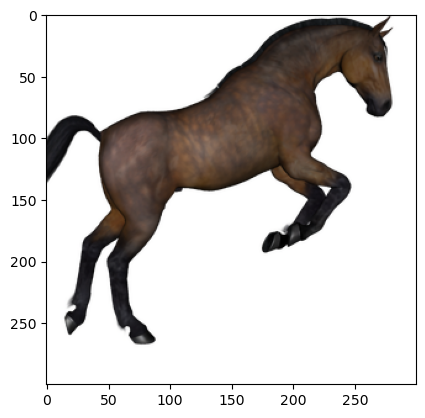

1/1 [==============================] - 0s 22ms/step
It is a horse


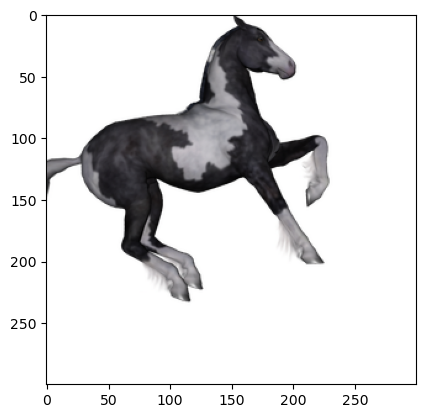

1/1 [==============================] - 0s 22ms/step
It is a horse


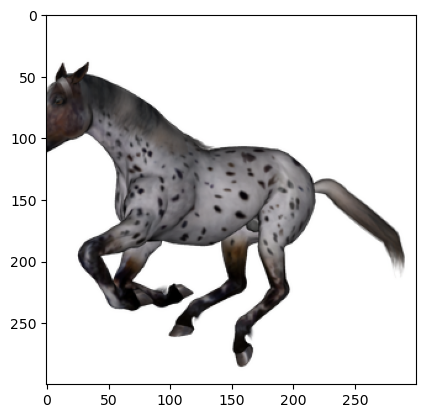

1/1 [==============================] - 0s 23ms/step
It is a human


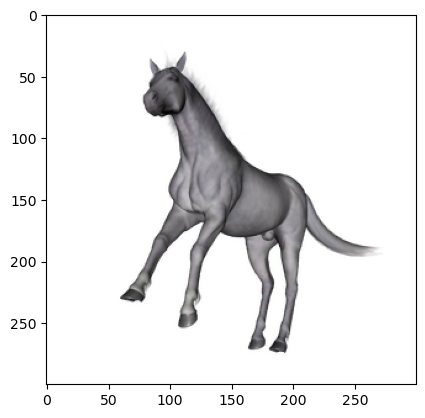

In [16]:
from keras.preprocessing import image
# for p in (validation_human_paths + validation_horse_paths):
#     image = imread(p)
#     plt.imshow(image)
#     plt.show()

def pred_horse_human(model, horse_human):
    test_image = tf.keras.preprocessing.image.load_img(horse_human, target_size = (300, 300))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)/255.
    test_image = np.expand_dims(test_image, axis = 0)
    
    result = model.predict(test_image)
    if(result[0][0] < 0.5):
        print("It is a horse")
    else:
        print("It is a human")


for p in (validation_human_paths + validation_horse_paths):
    pred_horse_human(model, p)
    image = imread(p)
    plt.imshow(image)
    plt.show()

In [17]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [18]:
history_train_validation = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 100,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/100
8/8 [==============================] - 11s 2s/step - loss: 0.7299 - acc: 0.8899 - val_loss: 2.1320 - val_acc: 0.6953
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 0.0407 - acc: 0.9911 - val_loss: 1.8967 - val_acc: 0.7891
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 0.2210 - acc: 0.9455 - val_loss: 1.4722 - val_acc: 0.7852
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.0330 - acc: 0.9933 - val_loss: 1.9055 - val_acc: 0.8008
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 0.0128 - acc: 0.9967 - val_loss: 1.8992 - val_acc: 0.8125
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 0.0067 - acc: 0.9990 - val_loss: 2.5218 - val_acc: 0.8008
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.0033 - acc: 0.9989 - val_loss: 2.6516 - val_acc: 0.8008
Epoch 8/100
8/8 [==============================] - 11s 1s/step - loss: 0.0060 - acc: 0.9967 - val

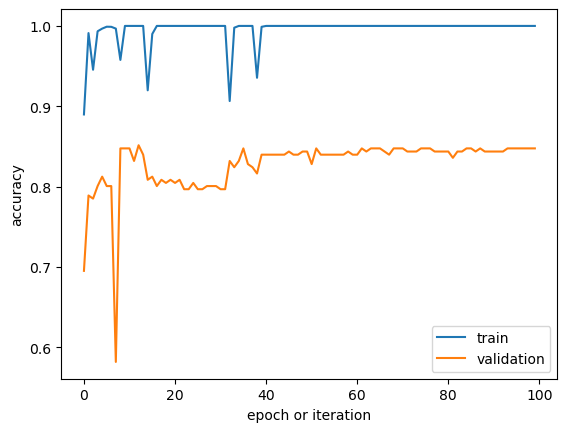

In [19]:
plt.plot(history_train_validation.history['acc'])
plt.plot(history_train_validation.history['val_acc'])
plt.legend(['train','validation'])
plt.xlabel('epoch or iteration')
plt.ylabel('accuracy')
plt.show()

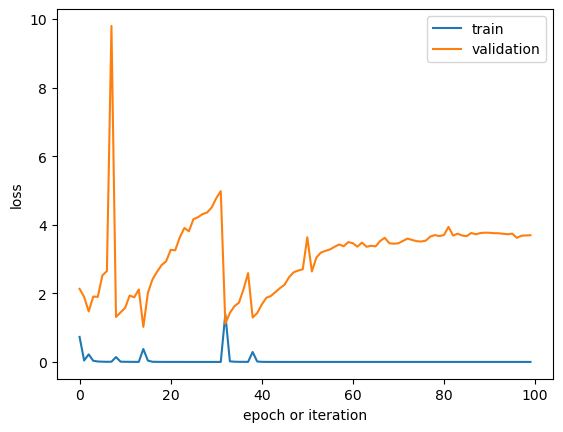

In [20]:
plt.plot(history_train_validation.history['loss'])
plt.plot(history_train_validation.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch or iteration')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 131ms/step


/tmp/ipykernel_23/3780952587.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_maps = np.hstack(layer_output[0, :, :, i] for i in range(num_feature_maps))


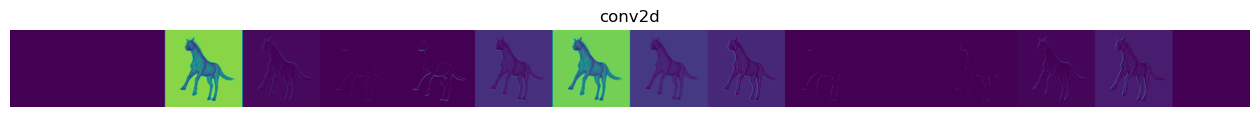

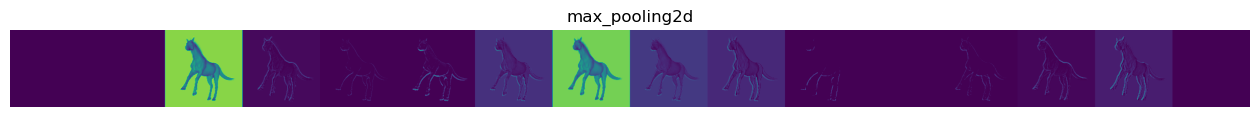

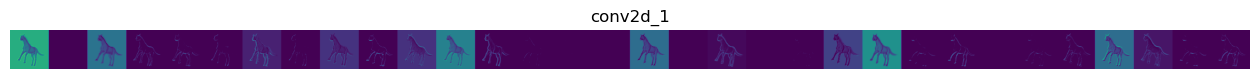

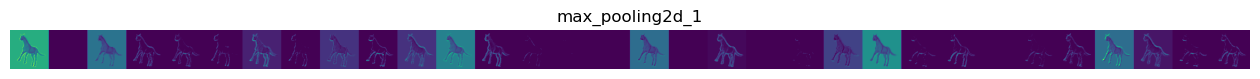

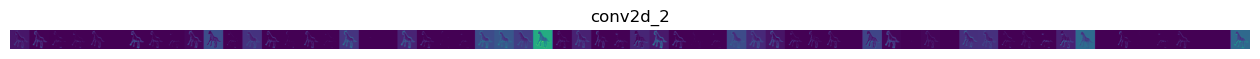

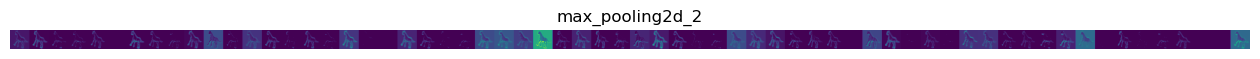

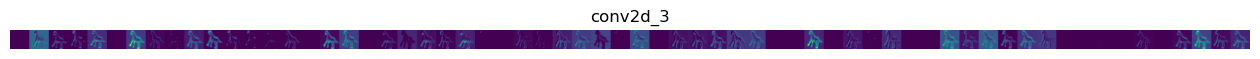

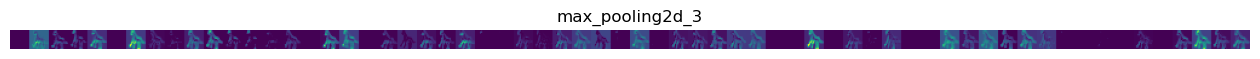

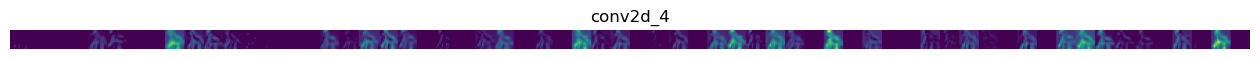

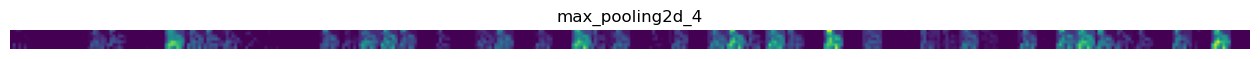

In [21]:


# Load and preprocess the image
image_path = validation_horse_paths[4]
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(300, 300))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)

# Create a submodel that includes convolutional and max-pooling layers
conv_maxpool_layers = [layer for layer in model.layers
                       if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D))]
conv_maxpool_model = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in conv_maxpool_layers])

# Get the outputs of convolutional and max-pooling layers for the input image
conv_maxpool_outputs = conv_maxpool_model.predict(image)

# Stack and visualize the feature maps side by side for each layer
for layer_output, layer in zip(conv_maxpool_outputs, conv_maxpool_layers):
    num_feature_maps = layer_output.shape[-1]
    stacked_maps = np.hstack(layer_output[0, :, :, i] for i in range(num_feature_maps))
    
    plt.figure(figsize=(16, 4))
    plt.imshow(stacked_maps, cmap='viridis')
    plt.title(layer.name)  # Add the layer's name as the title
    plt.axis('off')
    plt.show()

In [22]:
train_datagen_aug = ImageDataGenerator(
     rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode = 'nearest',
    rescale=1.0 / 255
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_path,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [23]:
validation_datagen_aug = ImageDataGenerator(
    rescale = 1/255
)

validation_generator_aug = validation_datagen_aug.flow_from_directory(
    val_path,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [24]:
history_aug = model.fit_generator(
    train_generator_aug,
    steps_per_epoch = 8,
    epochs = 100,
    validation_data = validation_generator_aug,
    validation_steps = 8,
    verbose = 2
)

/tmp/ipykernel_23/2588365453.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_aug = model.fit_generator(


Epoch 1/100
8/8 - 26s - loss: 1.0829 - acc: 0.7508 - val_loss: 0.8146 - val_acc: 0.6445 - 26s/epoch - 3s/step
Epoch 2/100
8/8 - 30s - loss: 0.3877 - acc: 0.8311 - val_loss: 2.2062 - val_acc: 0.5508 - 30s/epoch - 4s/step
Epoch 3/100
8/8 - 27s - loss: 0.3996 - acc: 0.8298 - val_loss: 0.4472 - val_acc: 0.7500 - 27s/epoch - 3s/step
Epoch 4/100
8/8 - 26s - loss: 0.3929 - acc: 0.8265 - val_loss: 2.0370 - val_acc: 0.5273 - 26s/epoch - 3s/step
Epoch 5/100
8/8 - 25s - loss: 0.4189 - acc: 0.8120 - val_loss: 1.3104 - val_acc: 0.5625 - 25s/epoch - 3s/step
Epoch 6/100
8/8 - 26s - loss: 0.5223 - acc: 0.8098 - val_loss: 0.8619 - val_acc: 0.6133 - 26s/epoch - 3s/step
Epoch 7/100
8/8 - 26s - loss: 0.4195 - acc: 0.8242 - val_loss: 1.4922 - val_acc: 0.5625 - 26s/epoch - 3s/step
Epoch 8/100
8/8 - 28s - loss: 0.2807 - acc: 0.8740 - val_loss: 2.1304 - val_acc: 0.5586 - 28s/epoch - 4s/step
Epoch 9/100
8/8 - 26s - loss: 0.2821 - acc: 0.8899 - val_loss: 0.3529 - val_acc: 0.8281 - 26s/epoch - 3s/step
Epoch 10/1

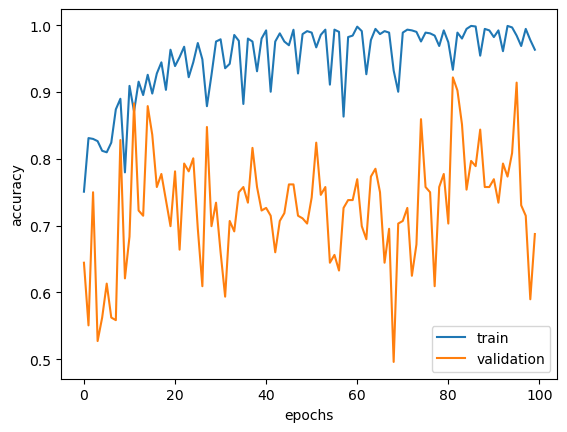

In [25]:
import matplotlib.pyplot as plt
plt.plot(history_aug.history['acc'])
plt.plot(history_aug.history['val_acc'])
plt.legend(['train','validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

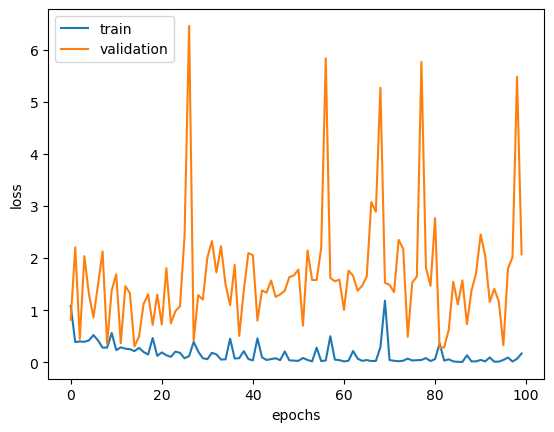

In [26]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [27]:
!ls '/kaggle/input/inception-v3/tensorflow2/classification/2'

saved_model.pb	variables


In [28]:
import tensorflow as tf
import tensorflow_hub as hub

model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (300, 300, 3)),
    hub.KerasLayer('/kaggle/input/inception-v3/tensorflow2/classification/2', trainable = False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_hub.build([None, 300, 300, 3])
model_hub.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              23853833  
                                                                 
 flatten_1 (Flatten)         (None, 1001)              0         
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1002      
                                                                 
Total params: 23,854,835
Trainable params: 1,002
Non-trainable params: 23,853,833
_________________________________________________________________


In [29]:
model_hub.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_hub = model_hub.fit(
    train_generator_aug,
    epochs=5,
    validation_data=validation_generator_aug
)

Epoch 1/5
9/9 [==============================] - 50s 4s/step - loss: 0.4288 - accuracy: 0.8033 - val_loss: 0.3409 - val_accuracy: 0.8789
Epoch 2/5
9/9 [==============================] - 32s 4s/step - loss: 0.1318 - accuracy: 0.9688 - val_loss: 0.1706 - val_accuracy: 0.9727
Epoch 3/5
9/9 [==============================] - 33s 4s/step - loss: 0.0790 - accuracy: 0.9805 - val_loss: 0.1013 - val_accuracy: 0.9922
Epoch 4/5
9/9 [==============================] - 32s 4s/step - loss: 0.0554 - accuracy: 0.9864 - val_loss: 0.0648 - val_accuracy: 0.9961
Epoch 5/5
9/9 [==============================] - 33s 4s/step - loss: 0.0398 - accuracy: 0.9922 - val_loss: 0.0426 - val_accuracy: 1.0000


In [30]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

for layer in base_model.layers:
    layer.trainable = False
last_layer = base_model.get_layer('mixed10')
print("last_layer_shape:", last_layer.output_shape)
last_output = last_layer.output



87910968/87910968 [==============================] - 0s 0us/step
last_layer_shape: (None, 8, 8, 2048)


In [31]:
from tensorflow.keras.optimizers import RMSprop

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr = 0.0001),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [32]:
history = model.fit(
    train_generator_aug,
    epochs=25,
    validation_data=validation_generator_aug
)

Epoch 1/25
9/9 [==============================] - 40s 4s/step - loss: 114.3187 - acc: 0.6534 - val_loss: 0.0847 - val_acc: 0.9961
Epoch 2/25
9/9 [==============================] - 33s 4s/step - loss: 13.9777 - acc: 0.9192 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/25
9/9 [==============================] - 33s 4s/step - loss: 1.0695 - acc: 0.9922 - val_loss: 4.1109e-36 - val_acc: 1.0000
Epoch 4/25
9/9 [==============================] - 33s 4s/step - loss: 0.7169 - acc: 0.9912 - val_loss: 7.0781e-34 - val_acc: 1.0000
Epoch 5/25
9/9 [==============================] - 32s 4s/step - loss: 0.6701 - acc: 0.9912 - val_loss: 1.4902e-15 - val_acc: 1.0000
Epoch 6/25
9/9 [==============================] - 32s 4s/step - loss: 0.1867 - acc: 0.9961 - val_loss: 4.8038e-21 - val_acc: 1.0000
Epoch 7/25
9/9 [==============================] - 32s 4s/step - loss: 0.0853 - acc: 0.9971 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/25
9/9 [==============================] - 32s 4s/step - loss: 44.9363

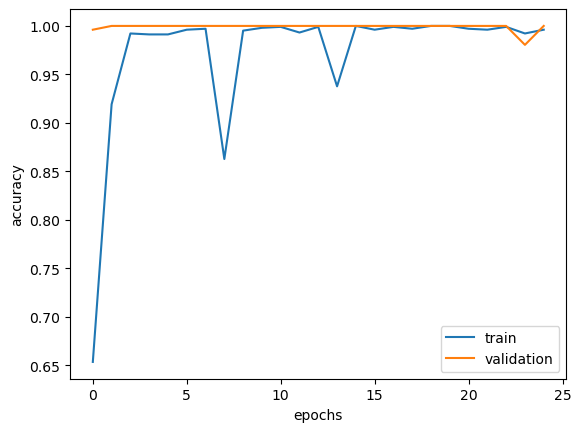

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

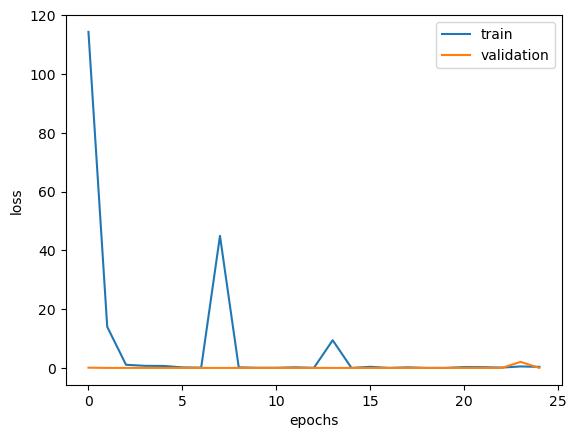

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()